# Titanic Competition Dataset EDA


***

In [18]:
!pip install opendatasets --quiet

In [19]:
URL = 'https://www.kaggle.com/c/titanic'

In [20]:
import opendatasets as od

In [21]:
od.download(URL)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [22]:
import os
os.listdir('titanic')

['gender_submission.csv', 'test.csv', 'train.csv']

In [23]:
import pandas as pd

In [24]:
train_df = pd.read_csv('titanic/train.csv')

In [25]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
train_df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [27]:
train_df.Age = train_df.Age.fillna(train_df.Age.median())

In [28]:
train_df.Embarked = train_df.Embarked.fillna(train_df.Embarked.mode())

In [ ]:
!pip install plotly --upgrade --quiet

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
fig = px.histogram(train_df, x='Pclass', color='Survived', title='Pclass vs Survived', height=500, width=600, color_discrete_sequence=['green', 'black'])

fig.update_layout(bargap=0.1)
fig.show()

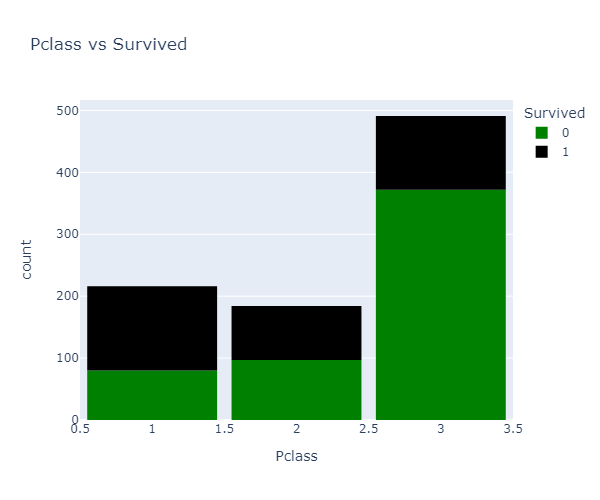

In [44]:
from IPython import display
display.Image("https://raw.githubusercontent.com/Moses-stack-art/Musa79/main/newplot.png")

- P1 class had the highest number of survivors.
- P3 class had the highest number of passengers who died.
- P2 class had a near to equal number of both passengers who survived and died.

In [31]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
px.histogram(train_df, x='Sex', color='Survived', title='Sex vs Survived', height=500, width=600, color_discrete_sequence=['green', 'black'])

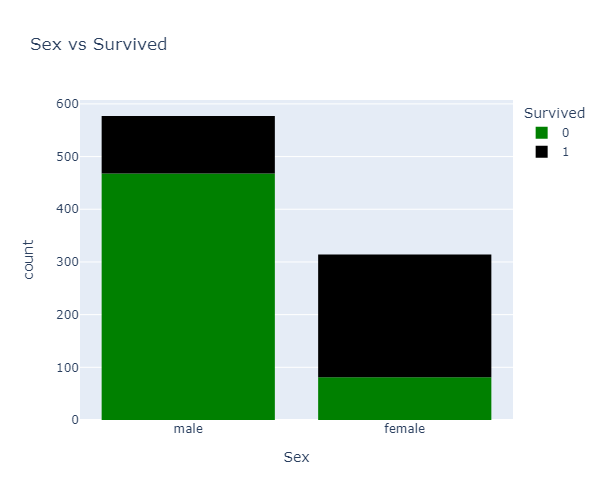

In [32]:
display.Image("https://raw.githubusercontent.com/Moses-stack-art/Musa79/main/newplot%20(1).png")

- Most passengers were male.
- Only 109/572 of the male passengers survived. (''9%'')
- Most female passengers (233) survived compared to the male passengers (109).


In [ ]:
fig = px.histogram(train_df, x='Age', marginal='box', color='Survived', title='Age vs Survived', color_discrete_sequence=['green', 'black'])
fig.update_layout(bargap=0.1)

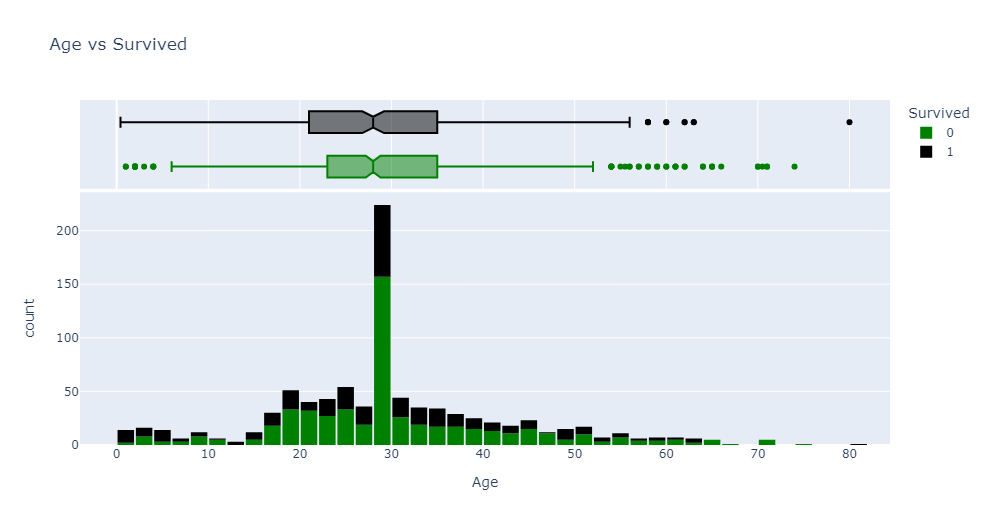

In [33]:
display.Image("https://raw.githubusercontent.com/Moses-stack-art/Musa79/main/newplot%20(2).png")

- Infants (Age <=4) had high survival rate.
- The oldest passenger (Age = 80) survived.
- Most passengers are in 15-35 age range.
- A significant number of 15-30 year olds did not survive.

In [ ]:
fig = px.histogram(train_df, x='Fare', marginal='box', color='Survived', title='Fare vs Survived', color_discrete_sequence=['green', 'black'])
fig.update_layout(bargap=0.1)

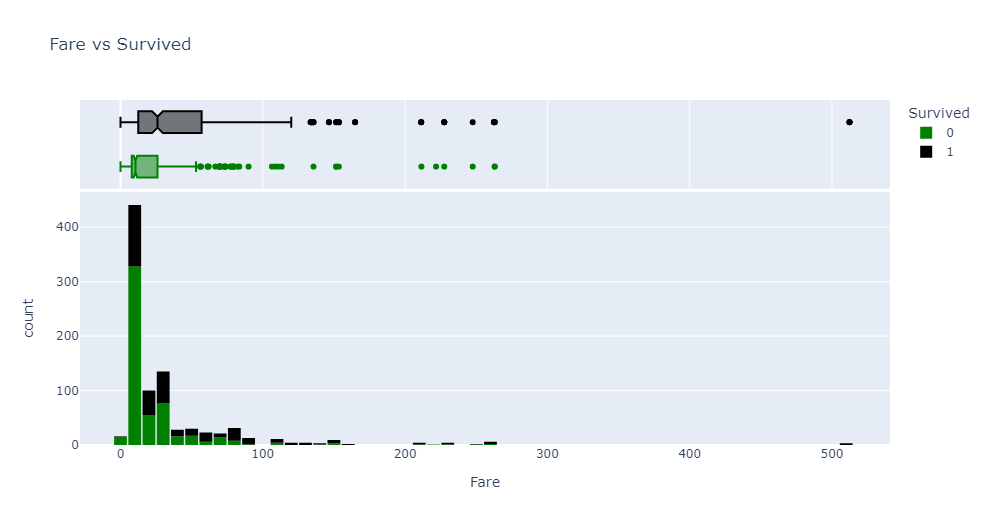

In [34]:
display.Image("https://raw.githubusercontent.com/Moses-stack-art/Musa79/main/newplot%20(3).png")

- Most passengers are 5-35 fare range.
- A significant number of passengers at the 5-35 fare range did not survive.
- Passenger at the 505-510 fare range survived.

In [35]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [36]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [37]:
train_df.drop('PassengerId', axis=1, inplace=True)
train_df.drop('Name', axis=1, inplace=True)
train_df.drop('Ticket', axis=1, inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)

In [38]:
train_df['Family_size'] = train_df['SibSp']+train_df['Parch'] + 1

In [39]:
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

In [40]:
train_df.corr()

,Survived,Pclass,Age,Fare,Family_size
Survived,1.000000,-0.338481,-0.064910,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.065997
Age,-0.064910,-0.339898,1.000000,0.096688,-0.245619
Fare,0.257307,-0.549500,0.096688,1.000000,0.217138
Family_size,0.016639,0.065997,-0.245619,0.217138,1.000000


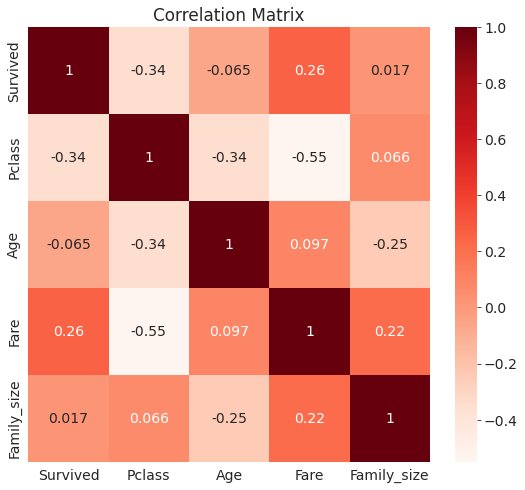

In [43]:
sns.heatmap(train_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

***